## Mahmoud Emara Term Project III
### Clustering Wheat Data

In [40]:
import csv
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy
import sklearn
from sklearn.model_selection import train_test_split

with open(r'D:\Mahmoud\Rutgers\UnderGraduate\07_Senior First Semester\Machine Learning\Seed_Data.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    area = []; perimeter = []
    compactness = []; lengKern = []
    widKern = []; asymcoeff = []
    lenKernGroove = []; target = []
    
    for row in readCSV:
        area.append(row[0])
        perimeter.append(row[1])
        compactness.append(row[2])
        lengKern.append(row[3])
        widKern.append(row[4])
        asymcoeff.append(row[5])
        lenKernGroove.append(row[6])
        target.append(row[7])

areaA = np.column_stack(area)
permA = np.column_stack(perimeter)
compA = np.column_stack(compactness)
lkerA = np.column_stack(lengKern)
wkerA = np.column_stack(widKern)
ascoA = np.column_stack(asymcoeff)
grovA = np.column_stack(lenKernGroove)
targA = np.column_stack(target)

allData= np.array(list(zip(areaA, permA, compA, lkerA, wkerA, ascoA, grovA, targA)))
dataSet = allData[0,0:7,1:].T
targetVal =allData[0,7:8,1:].T
dataSet = dataSet.astype(np.float)
targetVal = targetVal.astype(np.float)
print(dataSet.shape)
print(targetVal.shape)

splitR = 0.1
limit = (int)((1-splitR)*len(dataSet))
trainSet, testSet, ytrain, ytest = train_test_split(dataSet, targetVal, test_size = splitR)

print("Data dimensions:",dataSet.shape,"\nTrain Set dimensions:",trainSet.shape,"\nTest set dimensions:",testSet.shape)


(210, 7)
(210, 1)
Data dimensions: (210, 7) 
Train Set dimensions: (189, 7) 
Test set dimensions: (21, 7)


In [54]:
# PCA on training dataset
trainingSet = trainSet.T
meanVector = trainingSet.mean(axis=1)
meanMat = np.tile(meanVector.reshape(7,1),(1,limit))
centData = trainingSet - meanMat
print("Centered Data dimensions: ",centData.shape)

U, s, Vt = np.linalg.svd(centData)
kComp = 2
princ = U[:,0:kComp]
Xtilde = np.matmul(princ.T, centData)
print(Xtilde.shape)

Centered Data dimensions:  (7, 189)
(2, 189)


Normalized data dimensions:  (7, 189)
Dimensions of top values:  (7, 2)
Dimensions of projected data: (2, 189)


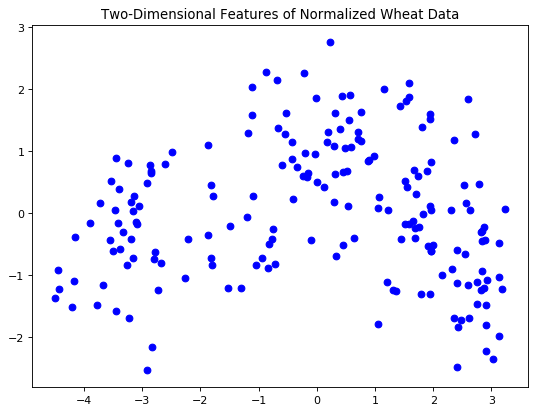

In [55]:
# Normalization of Data

normData = np.zeros((7,limit))

for i in range(len(trainingSet)):
    std = np.std(centData[i])
    for j in range(len(trainingSet[0])):
        normData[i][j] = centData[i][j] / std

print("Normalized data dimensions: ", normData.shape)

U, s, Vt = np.linalg.svd(normData)
newPrinc = U[:,0:kComp]
Xhat = np.matmul(newPrinc.T, normData)
print("Dimensions of top values: ",newPrinc.shape)
print("Dimensions of projected data:",Xhat.shape)

plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
onePlot = plt.scatter(Xhat[0], Xhat[1], color='b', marker='o', label='Data')
plt.title('Two-Dimensional Features of Normalized Wheat Data')
plt.show()

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb

from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

# Setting print options, limit numbers of precision
np.set_printoptions(precision=4, suppress=True)


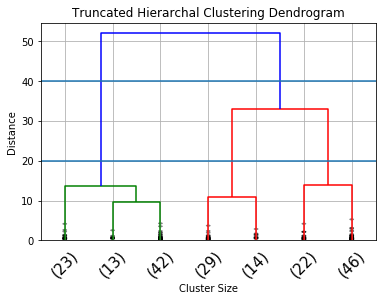

In [66]:
# Generate Dendrogram
Z = linkage(trainSet, 'ward')
dendrogram(Z, truncate_mode='lastp', p=7, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Truncated Hierarchal Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=20) # Helps have accurate count
plt.axhline(y=40)
plt.grid()
plt.show()


In [58]:
# Instantiate an agglomerative clustering object and check the true values of labels.

k = 3 # 3 clusters
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
trial1 = Hclustering.fit(trainSet)
sm.accuracy_score(ytrain, trial1.labels_)


0.291005291005291

In [59]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
trial2 = Hclustering.fit(trainSet)
sm.accuracy_score(ytrain, trial2.labels_)

0.2962962962962963

In [60]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
trial3 = Hclustering.fit(trainSet)
sm.accuracy_score(ytrain, trial3.labels_)

0.30687830687830686

In [61]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='complete')
trial4 = Hclustering.fit(trainSet)
sm.accuracy_score(ytrain, trial4.labels_)

0.8095238095238095

In [62]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='average')
trial5 = Hclustering.fit(trainSet)
sm.accuracy_score(ytrain, trial5.labels_)

0.3439153439153439

In [63]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='complete')
trial6 = Hclustering.fit(trainSet)
sm.accuracy_score(ytrain, trial6.labels_)

0.15343915343915343

We see that the best score was performed when the distance metric used was Manhattan distance, and a linkage parameter of Average.

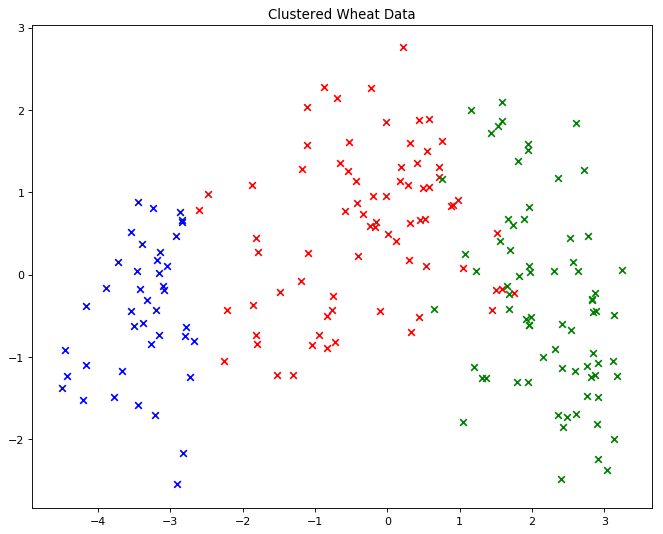

In [64]:
# print(Hclustering.labels_)
# print(ytrain)

class0x = list(); class1x = list(); class2x = list()
class0y = list(); class1y = list(); class2y = list()
predc0x = list(); predc1x = list(); predc2x = list()
predc0y = list(); predc1y = list(); predc2y = list()

for i in range(len(trainSet)):
    if(ytrain[i] == 0):
        class0x.append(Xhat.T[i][0])
        class0y.append(Xhat.T[i][1])
    if(ytrain[i] == 1):
        class1x.append(Xhat.T[i][0])
        class1y.append(Xhat.T[i][1])
    if(ytrain[i] == 2):
        class2x.append(Xhat.T[i][0])
        class2y.append(Xhat.T[i][1])

for i in range(len(trainSet)):
    if(trial4.labels_[i] == 0):
        predc0x.append(Xhat.T[i][0])
        predc0y.append(Xhat.T[i][1])
    if(trial4.labels_[i] == 1):
        predc1x.append(Xhat.T[i][0])
        predc1y.append(Xhat.T[i][1])
    if(trial4.labels_[i] == 2):
        predc2x.append(Xhat.T[i][0])
        predc2y.append(Xhat.T[i][1])
    
       
plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
# zPlot = plt.scatter(class0x, class0y, color='r', alpha=0.25, marker='o', s=100, label='Data')
# oPlot = plt.scatter(class1x, class1y, color='b', alpha=0.25, marker='o', s=100, label='Data')
# tPlot = plt.scatter(class2x, class2y, color='g', alpha=0.25, marker='o', s=100, label='Data')

pzPlot = plt.scatter(predc0x, predc0y, color='r', marker='x', label='Data')
poPlot = plt.scatter(predc1x, predc1y, color='b', marker='x', label='Data')
ptPlot = plt.scatter(predc2x, predc2y, color='g', marker='x', label='Data')
plt.title('Clustered Wheat Data')
plt.show()